## Peter Fuentes Rosa
## Final Project Clustering - Song Attributes

## Selecting Data

### 1- Preprocessing/Cleaning of Data

In [102]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [103]:
df = pd.read_csv("G:/My Drive/Documents 1/MScA 31008/Final Project/Peter Class files/tracks_v3.csv")

C:\Users\Peter\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [104]:
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,duration_ms,...,genre,label_name,major_label,label_matched,chart_status,award_status,selected_genre,genre_values,Select_genre_distict,genre_value_order
0,10iesoGb4mCYTcur1QfdO9,JCVD,Rien 100 Rien,2GLuHlc49dJKY8yzxUZb8p,Jul,"[""3IW7ScrzXmPvZhB27hmfgy""]",2,1,True,194266,...,rap marseille,D’Or et de Platine,0.0,1.0,0,0,rap,1,rap,1.0
1,0DlHQxrVijRqVUfuS6PKaY,Deixa de Onda (Porra Nenhuma),Deixa de Onda (Porra Nenhuma),1fjkJADMiiZWMDusZSMNix,"DENNIS, Xamã, LUDMILLA","[""6xlRSRMLgZbsSNd0BMobwy"", ""5YwzDz4RJfTiMHS4td...",1,1,True,184999,...,funk das antigas,Sony Music,1.0,1.0,0,0,trap,2,trap,2.0
2,2QtM6ZVLx13TBOO1iwmXYy,Cubra Libre Bar - Café Buddha del Mar Mix,Hotel Paradise del Mar (Chill Out Lounge Café ...,3wsWiiFbTF3TpC41yStCTL,Mark Bareilles,"[""22PKRoZlEMpKexRXSLStVP""]",12,1,False,332068,...,other,NaN,NaN,NaN,0,0,other,3,other,3.0
3,27hFQQS3cVUmIK3ser5bpu,More Than Gravity,More Than Gravity,4kcSIHj40oMyfHgMG6XAmO,Colin & Caroline,"[""2Y4125mDrgQyPD7dt76Rtm""]",1,1,False,266078,...,acoustic cover,NaN,NaN,NaN,0,0,pop,4,pop,4.0
4,1YcqYmviKagJ68DOmjSWQW,Tojo Tojo,Tojo Tojo,58NV8EvCFPHWwi7HHdVqSy,"Nik Tendo, Karlo","[""28oxY7ZfDt1BJFf8FVfpEh"", ""6gvVFtkTV4OCyQSCzG...",1,1,True,197010,...,czsk hip hop,W.C. Records,0.0,1.0,0,0,hip hop,5,hip hop,5.0


In [125]:
df_Song_Description = df[["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature","genre_values"]]

In [126]:
df_Song_Description.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_values
0,0.847,0.830,7.0,-5.873,0.0,0.034,0.479,2.540e-06,0.068,0.895,130.050,4.0,1
1,0.815,0.690,9.0,-4.622,1.0,0.047,0.290,0.000e+00,0.312,0.654,135.036,4.0,2
2,0.607,0.359,9.0,-13.140,0.0,0.039,0.823,9.120e-01,0.111,0.450,79.988,4.0,3
3,0.620,0.468,4.0,-9.648,1.0,0.027,0.715,3.930e-05,0.106,0.217,110.969,4.0,4
4,0.654,0.739,2.0,-6.595,1.0,0.465,0.186,0.000e+00,0.109,0.732,147.586,4.0,5


In [127]:
df_Song_Description.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
genre_values          int64
dtype: object

In [128]:
df_Song_sample = df_Song_Description

In [129]:
df_Song_sample.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_values
0,0.847,0.830,7.0,-5.873,0.0,0.034,0.479,2.540e-06,0.068,0.895,130.050,4.0,1
1,0.815,0.690,9.0,-4.622,1.0,0.047,0.290,0.000e+00,0.312,0.654,135.036,4.0,2
2,0.607,0.359,9.0,-13.140,0.0,0.039,0.823,9.120e-01,0.111,0.450,79.988,4.0,3
3,0.620,0.468,4.0,-9.648,1.0,0.027,0.715,3.930e-05,0.106,0.217,110.969,4.0,4
4,0.654,0.739,2.0,-6.595,1.0,0.465,0.186,0.000e+00,0.109,0.732,147.586,4.0,5


In [130]:
df_Song_sample.shape

(14967, 13)

In [131]:
df_Song_sample_norm = df_Song_sample.loc[:, df_Song_sample.columns != 'genre_values']
df_Song_sample_norm.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.847,0.830,7.0,-5.873,0.0,0.034,0.479,2.540e-06,0.068,0.895,130.050,4.0
1,0.815,0.690,9.0,-4.622,1.0,0.047,0.290,0.000e+00,0.312,0.654,135.036,4.0
2,0.607,0.359,9.0,-13.140,0.0,0.039,0.823,9.120e-01,0.111,0.450,79.988,4.0
3,0.620,0.468,4.0,-9.648,1.0,0.027,0.715,3.930e-05,0.106,0.217,110.969,4.0
4,0.654,0.739,2.0,-6.595,1.0,0.465,0.186,0.000e+00,0.109,0.732,147.586,4.0


In [132]:
df_Song_sample_result = df_Song_sample.loc[:, df_Song_sample.columns == 'genre_values']
df_Song_sample_result.head()

,genre_values
0,1
1,2
2,3
3,4
4,5


In [133]:
Song_df_norm =df_Song_sample_norm.apply(preprocessing.scale,axis=0)

In [134]:
Song_df_norm.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.303,0.950,0.467,2.355e-01,-1.214,-0.691,0.912,-0.244,-0.785,1.689,0.288,0.138
1,1.093,0.201,1.021,6.429e-01,0.824,-0.568,0.185,-0.244,0.930,0.644,0.459,0.138
2,-0.275,-1.572,1.021,-2.131e+00,-1.214,-0.641,2.234,5.462,-0.483,-0.240,-1.424,0.138
3,-0.190,-0.988,-0.363,-9.939e-01,0.824,-0.759,1.819,-0.244,-0.518,-1.250,-0.364,0.138
4,0.034,0.463,-0.916,3.526e-04,0.824,3.416,-0.215,-0.244,-0.497,0.982,0.888,0.138


In [153]:
Identifier =df['chart_status'] > 0
df['Tracks_that_charted'] = np.where(Identifier, 1, 0)
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,duration_ms,...,label_name,major_label,label_matched,chart_status,award_status,selected_genre,genre_values,Select_genre_distict,genre_value_order,Tracks_that_charted
0,10iesoGb4mCYTcur1QfdO9,JCVD,Rien 100 Rien,2GLuHlc49dJKY8yzxUZb8p,Jul,"[""3IW7ScrzXmPvZhB27hmfgy""]",2,1,True,194266,...,D’Or et de Platine,0.0,1.0,0,0,rap,1,rap,1.0,0
1,0DlHQxrVijRqVUfuS6PKaY,Deixa de Onda (Porra Nenhuma),Deixa de Onda (Porra Nenhuma),1fjkJADMiiZWMDusZSMNix,"DENNIS, Xamã, LUDMILLA","[""6xlRSRMLgZbsSNd0BMobwy"", ""5YwzDz4RJfTiMHS4td...",1,1,True,184999,...,Sony Music,1.0,1.0,0,0,trap,2,trap,2.0,0
2,2QtM6ZVLx13TBOO1iwmXYy,Cubra Libre Bar - Café Buddha del Mar Mix,Hotel Paradise del Mar (Chill Out Lounge Café ...,3wsWiiFbTF3TpC41yStCTL,Mark Bareilles,"[""22PKRoZlEMpKexRXSLStVP""]",12,1,False,332068,...,NaN,NaN,NaN,0,0,other,3,other,3.0,0
3,27hFQQS3cVUmIK3ser5bpu,More Than Gravity,More Than Gravity,4kcSIHj40oMyfHgMG6XAmO,Colin & Caroline,"[""2Y4125mDrgQyPD7dt76Rtm""]",1,1,False,266078,...,NaN,NaN,NaN,0,0,pop,4,pop,4.0,0
4,1YcqYmviKagJ68DOmjSWQW,Tojo Tojo,Tojo Tojo,58NV8EvCFPHWwi7HHdVqSy,"Nik Tendo, Karlo","[""28oxY7ZfDt1BJFf8FVfpEh"", ""6gvVFtkTV4OCyQSCzG...",1,1,True,197010,...,W.C. Records,0.0,1.0,0,0,hip hop,5,hip hop,5.0,0


In [135]:
Song_df_norm.isnull().sum().sum()

24

In [136]:
Song_df_norm = Song_df_norm.fillna(0)

In [137]:
Song_df_norm.isnull().sum().sum()

0

# Clustering by Genres Kmeans 

In [187]:
#Create Clusters
kmeans = KMeans(n_clusters=24, random_state = 0).fit(Song_df_norm)

In [188]:
kmeans

KMeans(n_clusters=24, random_state=0)

In [189]:
#Find the Cluster Centroids
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=Song_df_norm.columns)
pd.set_option('precision',3)
centroids

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.272,-0.183,-1.084,-0.039,0.811,-0.316,-0.390,-0.194,-0.181,-0.650,-0.368,0.138
1,0.639,0.442,0.723,0.436,0.824,-0.240,-0.354,-0.209,-0.154,0.871,-0.433,0.133
2,-1.052,-2.241,0.014,-1.925,0.325,-0.573,2.271,-0.121,-0.332,-1.055,-0.442,0.109
3,0.505,0.507,-0.865,0.474,-1.214,-0.306,-0.391,-0.203,-0.100,0.543,-0.276,0.125
4,-0.480,0.126,0.745,0.192,0.824,-0.460,-0.511,-0.173,-0.128,-0.791,-0.424,0.138
5,-0.935,-0.784,0.025,-0.356,0.165,-0.398,0.760,-0.148,-0.107,-0.560,0.241,-3.231
6,0.503,0.629,-1.099,0.516,0.824,-0.302,-0.353,-0.213,-0.134,1.016,-0.215,0.132
7,0.349,-0.754,0.056,-0.568,-1.214,-0.189,0.479,-0.187,-0.246,-0.558,-0.322,0.138
8,0.747,0.481,0.967,0.426,-1.214,-0.239,-0.345,-0.206,-0.212,0.914,-0.258,0.123
9,-0.791,-1.345,-0.166,-1.766,0.028,-0.507,1.319,4.678,-0.111,-1.036,-0.382,-0.042


In [190]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(Song_df_norm)

# find the closest cluster for each data point
minSquaredDistance = distances.min(axis = 1)**2

# combine with cluster labels into a dataframe
df_test = pd.DataFrame({'squaredDistance': minSquaredDistance,'cluster':kmeans.labels_},
                 index = Song_df_norm.index)
df_test.head(24)


,squaredDistance,cluster
0,3.828,8
1,2.817,1
2,6.764,9
3,2.440,18
4,4.216,14
5,1.818,19
6,5.924,7
7,6.310,13
8,4.413,19
9,5.872,11


In [191]:
# group by cluster and print information
for cluster,data in df_test.groupby('cluster'):
    count=len(data)
    withinClustSS = data.squaredDistance.sum()
    print (f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (945 members): 3207.26 within cluster 
Cluster 1 (1198 members): 3846.07 within cluster 
Cluster 2 (461 members): 3194.24 within cluster 
Cluster 3 (982 members): 3288.05 within cluster 
Cluster 4 (929 members): 3269.60 within cluster 
Cluster 5 (532 members): 4968.77 within cluster 
Cluster 6 (986 members): 3284.73 within cluster 
Cluster 7 (876 members): 4215.48 within cluster 
Cluster 8 (1077 members): 3501.81 within cluster 
Cluster 9 (187 members): 2036.12 within cluster 
Cluster 10 (321 members): 2865.55 within cluster 
Cluster 11 (644 members): 2493.84 within cluster 
Cluster 12 (585 members): 3020.90 within cluster 
Cluster 13 (579 members): 2767.99 within cluster 
Cluster 14 (675 members): 3836.13 within cluster 
Cluster 15 (694 members): 2888.83 within cluster 
Cluster 16 (103 members): 1758.06 within cluster 
Cluster 17 (573 members): 4953.35 within cluster 
Cluster 18 (709 members): 3103.48 within cluster 
Cluster 19 (583 members): 3007.33 within cluster 
Cluster 

In [192]:
from sklearn.metrics import classification_report

print(classification_report(df_Song_sample_result['genre_values'], df_test['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.01      0.03      0.01       249
           2       0.01      0.01      0.01       669
           3       0.09      0.05      0.07      1672
           4       0.12      0.06      0.08      1870
           5       0.05      0.02      0.03      1315
           6       0.12      0.13      0.12       920
           7       0.08      0.06      0.07      1078
           8       0.06      0.06      0.06      1011
           9       0.00      0.00      0.00      1060
          10       0.01      0.00      0.00       604
          11       0.02      0.02      0.02       731
          12       0.01      0.03      0.01       117
          13       0.06      0.04      0.05       806
          14       0.01      0.00      0.01       888
          15       0.06      0.09      0.08       478
          16       0.00      0.00      0.00       196
          17       0.04    

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  -------


### Finding k: Elbow Chart 

Elbow chart is a line chart depicting the decline in cluster heterogeneity as more clusters are added. 

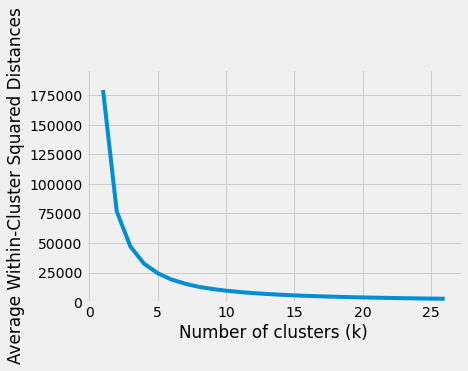

In [193]:
import matplotlib.pylab as plt
inertia = []  # The SSE value
for n_clusters in range(1,27):
    kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(Song_df_norm)
    inertia.append(kmeans.inertia_/n_clusters)
    
inertias =pd.DataFrame({'n_clusters':range(1,27),'inertia':inertia})

ax = inertias.plot(x='n_clusters',y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0,1.1*inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

### Cluster Separation

We can look at the between cluster distances to understand the separation, the higher the better. 

In [194]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_,metric='euclidean'))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000,4.649,2.100,2.567,6.165,2.593,3.543,3.716,2.243,3.589,...,2.783,2.291,4.994,9.435,3.239,5.310,3.826,3.049,1.933,3.088
1,4.649,0.000,3.845,5.177,4.955,3.512,5.175,3.774,5.348,5.088,...,5.133,5.131,6.255,6.529,1.989,3.633,5.064,4.193,3.929,5.259
2,2.100,3.845,0.000,2.276,5.729,2.686,3.415,2.882,2.869,3.665,...,3.378,3.168,4.961,8.783,2.603,4.783,3.726,2.213,2.292,3.532
3,2.567,5.177,2.276,0.000,6.571,3.525,3.041,3.091,2.177,3.245,...,2.602,1.974,5.093,9.934,3.444,5.731,4.043,1.687,2.819,3.160
4,6.165,4.955,5.729,6.571,0.000,5.515,6.590,5.696,6.622,6.600,...,6.452,6.510,3.251,4.558,5.144,5.873,6.429,5.987,5.710,6.715
5,2.593,3.512,2.686,3.525,5.515,0.000,3.327,2.098,3.432,2.978,...,2.236,3.269,5.054,8.489,2.756,4.612,3.893,3.156,2.292,3.689
6,3.543,5.175,3.415,3.041,6.590,3.327,0.000,2.866,3.348,2.919,...,2.900,3.205,5.559,9.702,3.951,5.952,4.634,2.889,3.323,2.668
7,3.716,3.774,2.882,3.091,5.696,2.098,2.866,0.000,3.778,2.656,...,2.483,3.431,5.189,8.562,2.889,4.830,4.148,2.200,2.894,3.664
8,2.243,5.348,2.869,2.177,6.622,3.432,3.348,3.778,0.000,3.470,...,2.702,2.263,5.174,9.953,3.769,5.823,4.160,2.894,2.742,3.089
9,3.589,5.088,3.665,3.245,6.600,2.978,2.919,2.656,3.470,0.000,...,2.594,3.447,5.341,9.703,4.105,5.665,4.264,3.101,3.642,2.336


### Silhouette coefficient

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

    > How close the data point is to other points in the cluster
    
    > How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

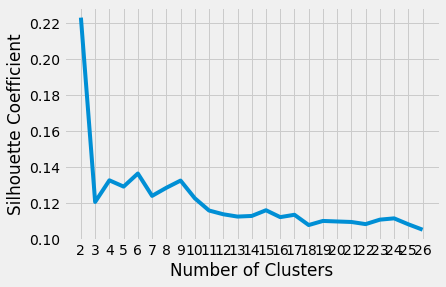

In [148]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 27):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(Song_df_norm)
    score = silhouette_score(Song_df_norm, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 27), silhouette_coefficients)
plt.xticks(range(2, 27))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

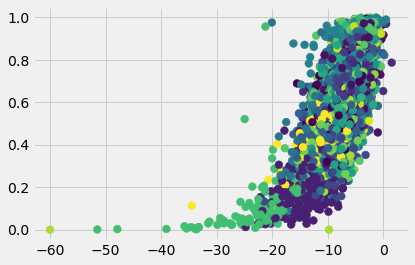

In [195]:
plt.scatter(x=df['loudness'], y=df['energy'],  c=df_test['cluster'], s=60)

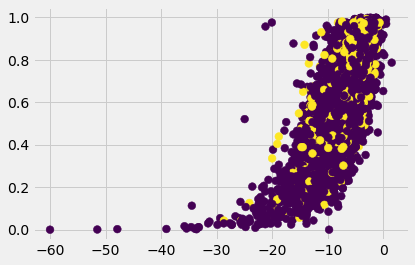

In [196]:
plt.scatter(x=df['loudness'], y=df['energy'],  c=df['Tracks_that_charted'], s=60)

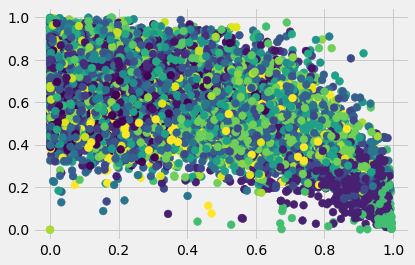

In [197]:
plt.scatter(x=df['acousticness'], y=df['energy'],  c=df_test['cluster'], s=60)

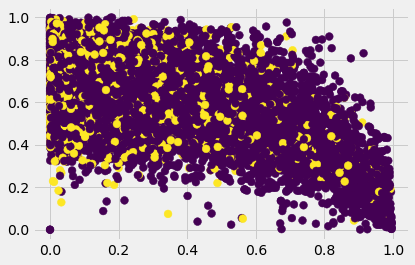

In [198]:
plt.scatter(x=df['acousticness'], y=df['energy'],  c=df['Tracks_that_charted'], s=60)

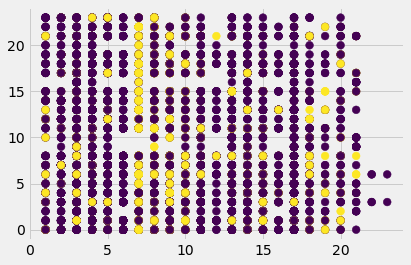

In [199]:
plt.scatter(x = df_Song_sample_result['genre_values'], y = df_test['cluster'], c=df['Tracks_that_charted'], s=60)

# Re adjust Clusters for best performance

In [200]:
#Create Clusters
kmeans = KMeans(n_clusters=3, random_state = 0).fit(Song_df_norm)

In [201]:
#Find the Cluster Centroids
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=Song_df_norm.columns)
pd.set_option('precision',3)
centroids

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.780,-1.433,-0.052,-1.239,0.274,-0.402,1.454,0.527,-0.205,-0.823,-0.196,-0.454
1,0.092,0.338,-0.127,0.306,0.823,0.016,-0.351,-0.125,0.064,0.167,0.064,0.102
2,0.270,0.275,0.192,0.220,-1.214,0.180,-0.269,-0.100,0.019,0.194,0.014,0.094


In [202]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(Song_df_norm)

# find the closest cluster for each data point
minSquaredDistance = distances.min(axis = 1)**2

# combine with cluster labels into a dataframe
df_test = pd.DataFrame({'squaredDistance': minSquaredDistance,'cluster':kmeans.labels_},
                 index = Song_df_norm.index)
df_test.head(24)


,squaredDistance,cluster
0,6.732,2
1,4.228,1
2,31.730,0
3,2.520,0
4,13.985,1
5,6.467,2
6,10.912,2
7,9.577,1
8,7.273,2
9,9.943,1


In [203]:
# group by cluster and print information
for cluster,data in df_test.groupby('cluster'):
    count=len(data)
    withinClustSS = data.squaredDistance.sum()
    print (f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (2669 members): 41604.18 within cluster 
Cluster 1 (6969 members): 55636.33 within cluster 
Cluster 2 (5329 members): 43950.32 within cluster 


### Finding k: Elbow Chart 

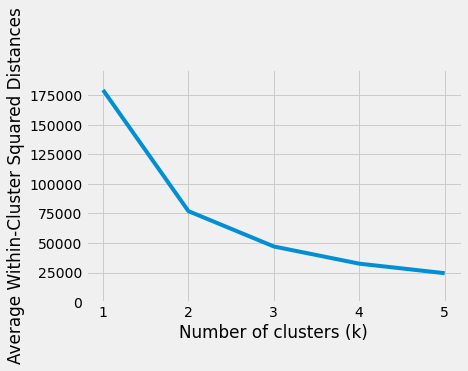

In [204]:
import matplotlib.pylab as plt
inertia = []  # The SSE value
for n_clusters in range(1,6):
    kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(Song_df_norm)
    inertia.append(kmeans.inertia_/n_clusters)
    
inertias =pd.DataFrame({'n_clusters':range(1,6),'inertia':inertia})

ax = inertias.plot(x='n_clusters',y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0,1.1*inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

### Cluster Separation

In [205]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_,metric='euclidean'))

,0,1,2,3,4
0,0.000,5.689,5.951,4.998,5.640
1,5.689,0.000,2.647,3.490,2.085
2,5.951,2.647,0.000,3.732,2.726
3,4.998,3.490,3.732,0.000,3.216
4,5.640,2.085,2.726,3.216,0.000


### Silhouette coefficient

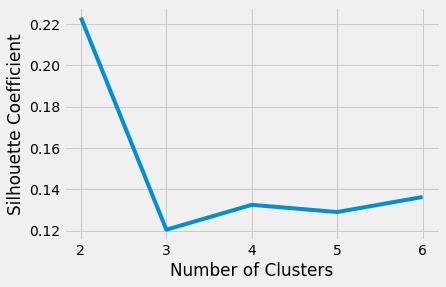

In [206]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(Song_df_norm)
    score = silhouette_score(Song_df_norm, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

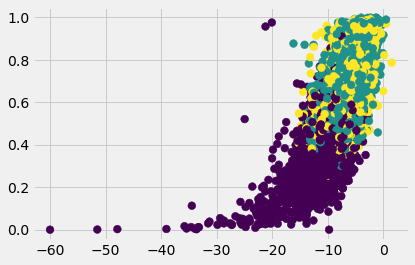

In [207]:
plt.scatter(x=df['loudness'], y=df['energy'],  c=df_test['cluster'], s=60)

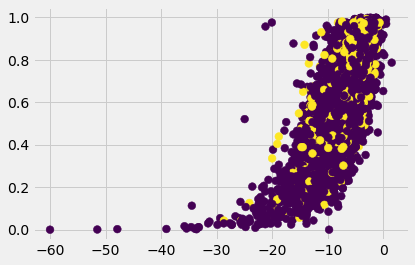

In [208]:
plt.scatter(x=df['loudness'], y=df['energy'],  c=df['Tracks_that_charted'], s=60)

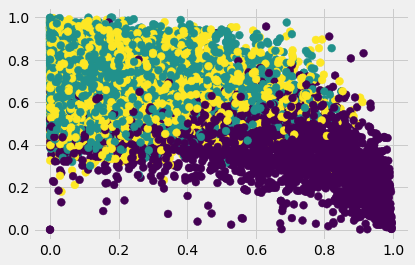

In [209]:
plt.scatter(x=df['acousticness'], y=df['energy'],  c=df_test['cluster'], s=60)

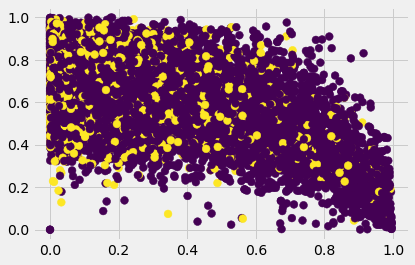

In [210]:
plt.scatter(x=df['acousticness'], y=df['energy'],  c=df['Tracks_that_charted'], s=60)

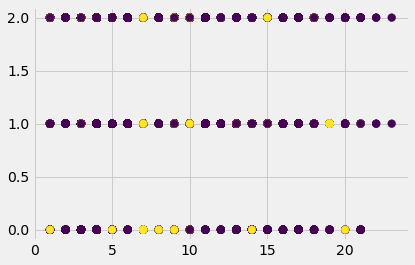

In [211]:
plt.scatter(x = df_Song_sample_result['genre_values'], y = df_test['cluster'], c=df['Tracks_that_charted'], s=60)